In [74]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.animation as ani
from matplotlib import pyplot
import random
from matplotlib import lines

from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count
import seaborn


In [108]:
def upper_columns(data):
    columns = data
    myList = []
    for name in columns:
        myList.append(name.upper())
    data.columns = myList

### Census.gov API Call

In [75]:
response = None
url1 = 'https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR&for=state:*'
url2 ='https://api.census.gov/data/timeseries/poverty/saipe?get=SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR&for=us'

url3 = 'https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR&for=county:*'

poverty_response1 = requests.get(url1)
poverty_response2 = requests.get(url2)
poverty_response3 = requests.get(url3)

Convert our api response to json

In [76]:
poverty_response_json1 = poverty_response1.json()
poverty_response_json2 = poverty_response2.json()
poverty_response_json3 = poverty_response3.json()

load Poverty Data in DF

In [77]:
poverty_state = pd.DataFrame(poverty_response_json1[1:], columns=poverty_response_json1[0])
poverty_nat = pd.DataFrame(poverty_response_json2[1:], columns=poverty_response_json2[0])
poverty_county = pd.DataFrame(poverty_response_json3[1:], columns=poverty_response_json3[0])

In [78]:
poverty_county.head(5).shape
poverty_county

,NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR,state,county
0,Autauga County,14.3,20.2,26898,1989,01,001
1,Baldwin County,13.2,18.6,24043,1989,01,003
2,Barbour County,26.2,38.2,18673,1989,01,005
3,Bibb County,18.9,25.0,19604,1989,01,007
4,Blount County,13.4,19.4,24035,1989,01,009
...,...,...,...,...,...,...,...
91108,Sweetwater County,9.2,9.7,74677,2021,56,037
91109,Teton County,5.9,5.5,102709,2021,56,039
91110,Uinta County,9.4,11.2,70162,2021,56,041
91111,Washakie County,10.2,12.5,62176,2021,56,043


In [79]:
poverty_state.head(5)

,NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR,state
0,Alabama,17.7,24.1,22202,1989,01
1,Alaska,10.6,15.4,33885,1989,02
2,Arizona,14.7,23.3,28924,1989,04
3,Arkansas,17.9,24.4,20729,1989,05
4,California,12.7,21.3,33474,1989,06


In [80]:
state_name_df = poverty_state[['NAME','state']]



In [81]:
state_name_df.rename(columns={'NAME': "STATE_NAME"}, inplace=True)

C:\Users\kendr\AppData\Local\Temp\ipykernel_7508\1187030159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_name_df.rename(columns={'NAME': "STATE_NAME"}, inplace=True)


In [82]:
state_name_df.head(5)

,STATE_NAME,state
0,Alabama,01
1,Alaska,02
2,Arizona,04
3,Arkansas,05
4,California,06


In [83]:
poverty_county_state = state_name_df.merge(poverty_county, on='state')

In [84]:
poverty_county_state.shape
poverty_county_state = poverty_county_state.drop_duplicates()

In [85]:
poverty_state = poverty_state.drop(columns='state')
poverty_nat = poverty_nat.drop(columns='us')
poverty_county_state = poverty_county_state.drop(columns='state')

poverty_county_state = poverty_county_state.drop(columns='county')

poverty_state = poverty_state.rename(columns={"NAME": "STATE", "SAEPOVRTALL_PT": "PR_ALL", "SAEPOVRT0_17_PT": "PR_YOUTH", 'SAEMHI_PT': 'MED_HH_INCOME' })
poverty_nat = poverty_nat.rename(columns={"NAME": "STATE", "SAEPOVRTALL_PT": "PR_ALL", "SAEPOVRT0_17_PT": "PR_YOUTH", 'SAEMHI_PT': 'MED_HH_INCOME' })

poverty_county_state = poverty_county_state.rename(columns={"NAME": "COUNTY", "SAEPOVRTALL_PT": "PR_ALL", "SAEPOVRT0_17_PT": "PR_YOUTH", 'SAEMHI_PT': 'MED_HH_INCOME' })

In [86]:
poverty_state = poverty_state.astype({'PR_ALL': float, 'PR_YOUTH': float, 'MED_HH_INCOME': float, 'YEAR': int})
poverty_nat = poverty_nat.astype({'PR_ALL': float, 'PR_YOUTH': float, 'MED_HH_INCOME': float, 'YEAR': int})
poverty_county_state = poverty_county_state.astype({'PR_ALL': float, 'PR_YOUTH': float, 'MED_HH_INCOME': float, 'YEAR': int})

In [87]:
print(poverty_state.dtypes)
print(poverty_nat.dtypes)
print(poverty_county_state.dtypes)

STATE             object
PR_ALL           float64
PR_YOUTH         float64
MED_HH_INCOME    float64
YEAR               int32
dtype: object
PR_ALL           float64
PR_YOUTH         float64
MED_HH_INCOME    float64
YEAR               int32
dtype: object
STATE_NAME        object
COUNTY            object
PR_ALL           float64
PR_YOUTH         float64
MED_HH_INCOME    float64
YEAR               int32
dtype: object


In [88]:
poverty_nat = poverty_nat[poverty_nat['YEAR'] >= 2017]
poverty_state = poverty_state[poverty_state['YEAR'] >= 2017]

# county_df = poverty_county_state[poverty_county_state['YEAR'] >= 2017]

In [89]:
poverty_state = poverty_state[poverty_state['STATE'] != 'Guam'] 
poverty_state = poverty_state[poverty_state['STATE'] != 'Puerto Rico'] 
poverty_state = poverty_state[poverty_state['STATE'] != 'Virgin Islands']
poverty_state = poverty_state[poverty_state['STATE'] != 'District of Columbia']

## Graphs for County Poverty

In [90]:
county_df = poverty_county_state
minnesota = county_df[county_df['STATE_NAME'] == 'Minnesota']
hennepin = minnesota[minnesota['COUNTY'] == 'Hennepin County']

In [91]:
hennepin = hennepin.drop_duplicates()

array([[<AxesSubplot:title={'center':'PR_ALL'}>,
        <AxesSubplot:title={'center':'PR_YOUTH'}>],
       [<AxesSubplot:title={'center':'MED_HH_INCOME'}>,
        <AxesSubplot:title={'center':'YEAR'}>]], dtype=object)

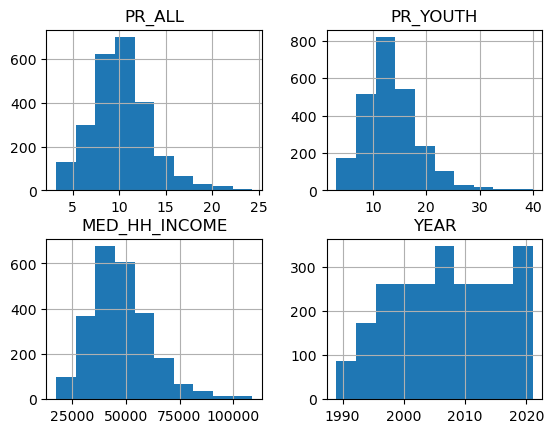

In [92]:
minnesota.hist(bins=10)

<AxesSubplot:xlabel='PR_ALL', ylabel='MED_HH_INCOME'>

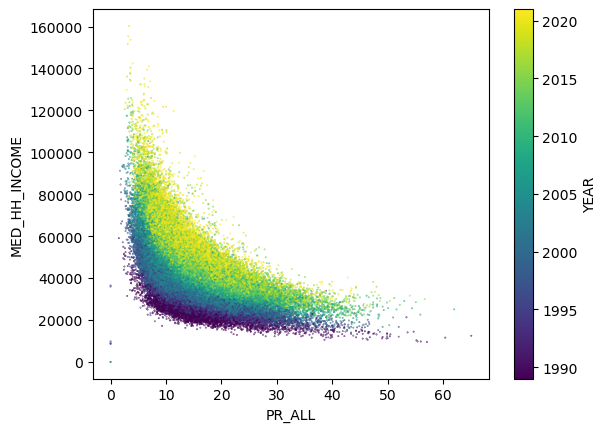

In [93]:
county_df.plot.scatter(y='MED_HH_INCOME', x='PR_ALL', c='YEAR', colormap='viridis', s=.1)


<AxesSubplot:xlabel='PR_ALL', ylabel='MED_HH_INCOME'>

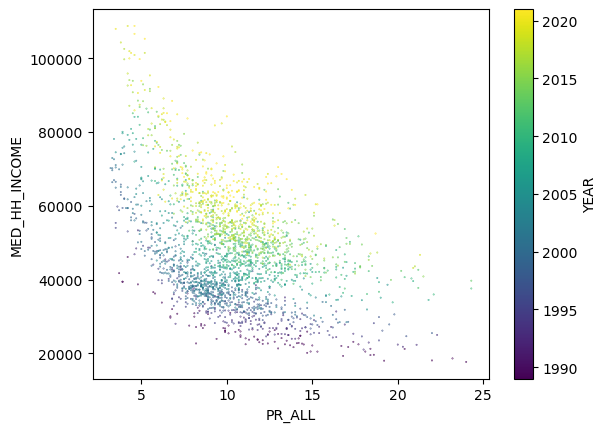

In [94]:
minnesota.plot.scatter(y='MED_HH_INCOME', x='PR_ALL', c='YEAR', colormap='viridis', s=.1)

<AxesSubplot:xlabel='YEAR', ylabel='MED_HH_INCOME'>

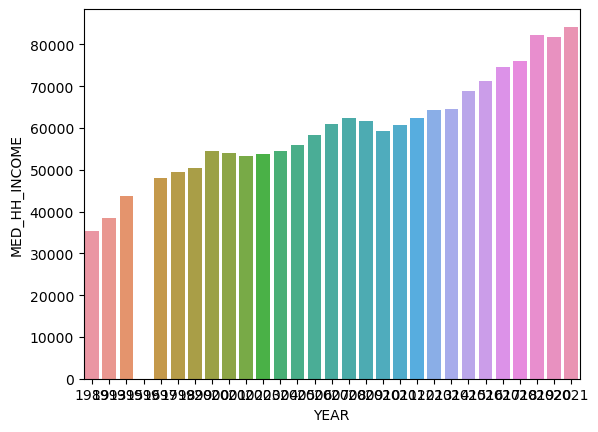

In [95]:
seaborn.barplot(x='YEAR', y='MED_HH_INCOME', data = hennepin)


<AxesSubplot:xlabel='YEAR', ylabel='PR_ALL'>

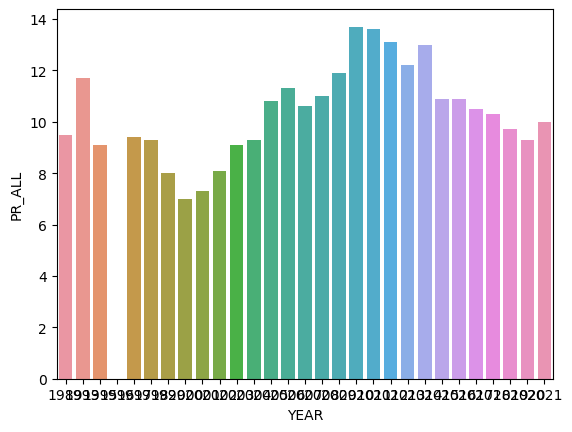

In [96]:
seaborn.barplot(x='YEAR', y='PR_ALL', data = hennepin)

In [97]:
poverty_county.columns

Index(['NAME', 'SAEPOVRTALL_PT', 'SAEPOVRT0_17_PT', 'SAEMHI_PT', 'YEAR',
       'state', 'county'],
      dtype='object')

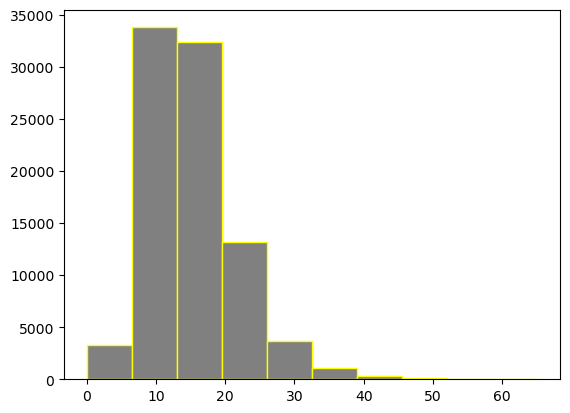

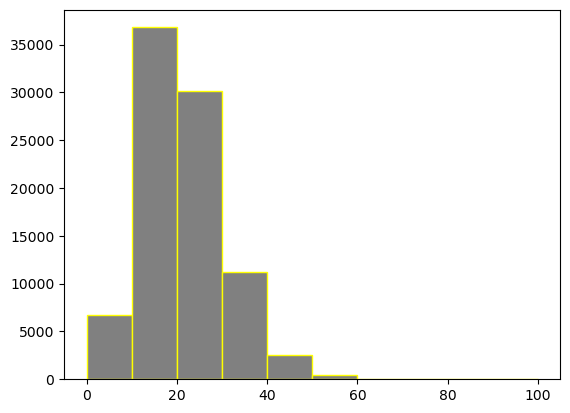

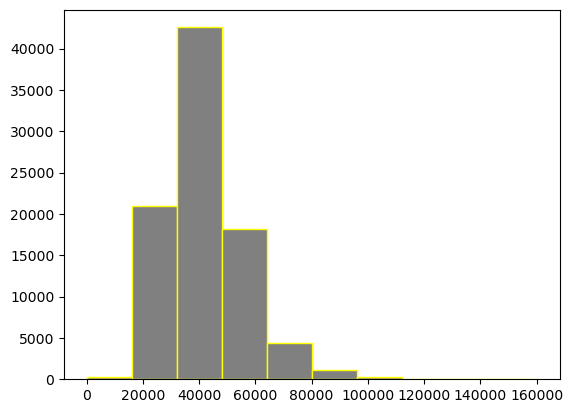

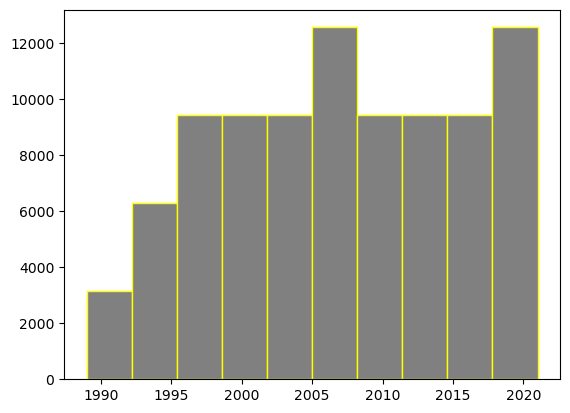

In [98]:
plt.hist(county_df['PR_ALL'], edgecolor="yellow", color="grey")
plt.show()
plt.hist(county_df['PR_YOUTH'], edgecolor="yellow", color="grey")
plt.show()
plt.hist(county_df['MED_HH_INCOME'], edgecolor="yellow", color="grey")
plt.show()
plt.hist(county_df['YEAR'], edgecolor="yellow", color="grey")
plt.show()

In [99]:
poverty_county

,NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR,state,county
0,Autauga County,14.3,20.2,26898,1989,01,001
1,Baldwin County,13.2,18.6,24043,1989,01,003
2,Barbour County,26.2,38.2,18673,1989,01,005
3,Bibb County,18.9,25.0,19604,1989,01,007
4,Blount County,13.4,19.4,24035,1989,01,009
...,...,...,...,...,...,...,...
91108,Sweetwater County,9.2,9.7,74677,2021,56,037
91109,Teton County,5.9,5.5,102709,2021,56,039
91110,Uinta County,9.4,11.2,70162,2021,56,041
91111,Washakie County,10.2,12.5,62176,2021,56,043


5 Highest Poverty levels by county

In [100]:
county_df = county_df.drop_duplicates()

In [101]:

county2021_df = county_df[county_df['YEAR'] >= 2021]

In [102]:
county2021_df.nlargest(10,'PR_ALL')

,STATE_NAME,COUNTY,PR_ALL,PR_YOUTH,MED_HH_INCOME,YEAR
1179433,Mississippi,Issaquena County,43.9,58.4,29050.0,2021
1987325,South Dakota,Oglala Lakota County,43.5,41.4,35046.0,2021
1674101,North Dakota,Sioux County,42.8,50.7,40307.0,2021
1987289,South Dakota,Corson County,41.9,53.1,34372.0,2021
837421,Kentucky,Martin County,40.5,44.3,29387.0,2021
936711,Louisiana,East Carroll Parish,39.9,50.5,30288.0,2021
1987334,South Dakota,Todd County,39.8,48.1,36362.0,2021
1179472,Mississippi,Sunflower County,38.7,58.5,34017.0,2021
1987340,South Dakota,Ziebach County,38.1,45.8,37066.0,2021
1179419,Mississippi,Coahoma County,37.9,54.1,31234.0,2021


In [105]:
uscounties_df = pd.read_csv("../data/uscounties.csv")

In [109]:
upper_columns(uscounties_df)

In [110]:
uscounties_df.head(5)

,COUNTY,COUNTY_ASCII,COUNTY_FULL,COUNTY_FIPS,STATE_ID,STATE_NAME,LAT,LNG,POPULATION
0,Los Angeles,Los Angeles,Los Angeles County,6037,CA,California,34.3209,-118.2247,10019635
1,Cook,Cook,Cook County,17031,IL,Illinois,41.8401,-87.8168,5265398
2,Harris,Harris,Harris County,48201,TX,Texas,29.8577,-95.3936,4697957
3,Maricopa,Maricopa,Maricopa County,4013,AZ,Arizona,33.3490,-112.4915,4367186
4,San Diego,San Diego,San Diego County,6073,CA,California,33.0343,-116.7350,3296317


In [107]:
county2021_df.head(5)

,STATE_NAME,COUNTY,PR_ALL,PR_YOUTH,MED_HH_INCOME,YEAR
1876,Alabama,Autauga County,10.7,16.1,66444.0,2021
1877,Alabama,Baldwin County,10.8,16.4,65658.0,2021
1878,Alabama,Barbour County,23.0,35.1,38649.0,2021
1879,Alabama,Bibb County,20.6,29.0,48454.0,2021
1880,Alabama,Blount County,12.0,16.7,56894.0,2021


In [124]:
county2021_locs_df = county2021_df.merge(uscounties_df, how='left', left_on=['STATE_NAME', 'COUNTY'], right_on=['STATE_NAME', 'COUNTY_FULL'])

In [126]:
county2021_locs_df.head(3)

,STATE_NAME,COUNTY_x,PR_ALL,PR_YOUTH,MED_HH_INCOME,YEAR,COUNTY_y,COUNTY_ASCII,COUNTY_FULL,COUNTY_FIPS,STATE_ID,LAT,LNG,POPULATION
0,Alabama,Autauga County,10.7,16.1,66444.0,2021,Autauga,Autauga,Autauga County,1001.0,AL,32.5349,-86.6427,58239.0
1,Alabama,Baldwin County,10.8,16.4,65658.0,2021,Baldwin,Baldwin,Baldwin County,1003.0,AL,30.7276,-87.7226,227131.0
2,Alabama,Barbour County,23.0,35.1,38649.0,2021,Barbour,Barbour,Barbour County,1005.0,AL,31.8696,-85.3932,25259.0


In [157]:
county2021_final = county2021_locs_df[county2021_locs_df['STATE_NAME','PR_ALL','PR_YOUTH','MED_HH_INCOME','COUNTY_FULL','LAT','LNG','POPULATION']]

KeyError: ('STATE_NAME', 'PR_ALL', 'PR_YOUTH', 'MED_HH_INCOME', 'COUNTY_FULL', 'LAT', 'LNG', 'POPULATION')

In [129]:
county2021_final = county2021_locs_df[['STATE_NAME','PR_ALL','PR_YOUTH','MED_HH_INCOME','COUNTY_FULL','LAT','LNG','POPULATION']]

In [130]:
county2021_final.head()

,STATE_NAME,PR_ALL,PR_YOUTH,MED_HH_INCOME,COUNTY_FULL,LAT,LNG,POPULATION
0,Alabama,10.7,16.1,66444.0,Autauga County,32.5349,-86.6427,58239.0
1,Alabama,10.8,16.4,65658.0,Baldwin County,30.7276,-87.7226,227131.0
2,Alabama,23.0,35.1,38649.0,Barbour County,31.8696,-85.3932,25259.0
3,Alabama,20.6,29.0,48454.0,Bibb County,32.9986,-87.1265,22412.0
4,Alabama,12.0,16.7,56894.0,Blount County,33.9809,-86.5674,58884.0


In [137]:
import matplotlib
import numpy as np
np.random.seed(seed=30)

cmap = matplotlib.cm.get_cmap('Spectral') # Getting a list of color values.

In [146]:
color_dict = pd.Series({k:cmap(np.random.rand()) for k in county2021_final['PR_ALL'].unique()})
color_dict.name = 'color_dict'

county2021_final = pd.merge(county2021_final, color_dict, how='left', left_on='PR_ALL', right_index=True)

In [160]:
lowest10 = county2021_final.nsmallest(10,'PR_ALL')

<AxesSubplot:title={'center':'Poverty Rates vs Median Income by County'}, xlabel='Longitude', ylabel='Latitude'>

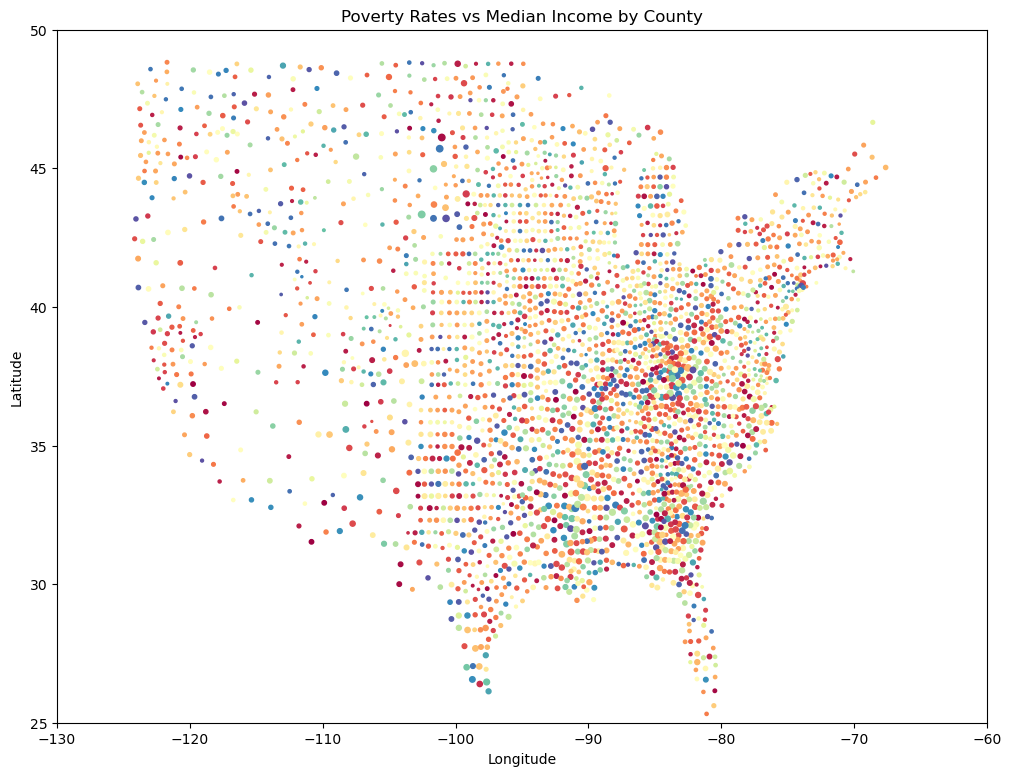

In [166]:



county2021_final.plot.scatter(x='LNG', y='LAT', ylim=(25,50), xlim=(-130,-60),s=(county2021_final['PR_ALL']/2),c=county2021_final['color_dict'],figsize=(12,9),title="Poverty Rates vs Median Income by County", xlabel='Longitude',ylabel='Latitude')